In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil as du

In [2]:
import matplotlib
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('Fremont_Bridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-31 23:00:00,7.0,6.0
2019-01-31 22:00:00,13.0,16.0
2019-01-31 21:00:00,18.0,27.0
2019-01-31 20:00:00,32.0,33.0
2019-01-31 19:00:00,40.0,94.0


In [4]:
data.columns=['East','West']
data['Total'] = data['East'] + data['West']

In [5]:
data_2013 = data['2013']
data_2013

,East,West,Total
Date,,,
2013-12-31 23:00:00,17.0,5.0,22.0
2013-12-31 22:00:00,10.0,4.0,14.0
2013-12-31 21:00:00,5.0,6.0,11.0
2013-12-31 20:00:00,13.0,23.0,36.0
2013-12-31 19:00:00,21.0,17.0,38.0
...,...,...,...
2013-01-01 04:00:00,2.0,2.0,4.0
2013-01-01 03:00:00,2.0,4.0,6.0
2013-01-01 02:00:00,8.0,8.0,16.0


In [6]:
hourly_ticks = 60 * 60 * np.arange(24)

In [11]:
data_2013['Weekday'] = data_2013.index.strftime("%A")
data_2013

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,East,West,Total,Weekday
Date,,,,
2013-12-31 23:00:00,17.0,5.0,22.0,Tuesday
2013-12-31 22:00:00,10.0,4.0,14.0,Tuesday
2013-12-31 21:00:00,5.0,6.0,11.0,Tuesday
2013-12-31 20:00:00,13.0,23.0,36.0,Tuesday
2013-12-31 19:00:00,21.0,17.0,38.0,Tuesday
...,...,...,...,...
2013-01-01 04:00:00,2.0,2.0,4.0,Tuesday
2013-01-01 03:00:00,2.0,4.0,6.0,Tuesday
2013-01-01 02:00:00,8.0,8.0,16.0,Tuesday


In [22]:
monday_df = data_2013[data_2013['Weekday'].isin(['Monday'])]
monday_df

,East,West,Total,Weekday
Date,,,,
2013-12-30 23:00:00,9.0,15.0,24.0,Monday
2013-12-30 22:00:00,14.0,9.0,23.0,Monday
2013-12-30 21:00:00,12.0,12.0,24.0,Monday
2013-12-30 20:00:00,26.0,17.0,43.0,Monday
2013-12-30 19:00:00,25.0,39.0,64.0,Monday
...,...,...,...,...
2013-01-07 04:00:00,3.0,1.0,4.0,Monday
2013-01-07 03:00:00,0.0,0.0,0.0,Monday
2013-01-07 02:00:00,0.0,0.0,0.0,Monday


In [23]:
friday_df = data_2013[data_2013['Weekday'].isin(['Friday'])]
friday_df

,East,West,Total,Weekday
Date,,,,
2013-12-27 23:00:00,5.0,6.0,11.0,Friday
2013-12-27 22:00:00,5.0,8.0,13.0,Friday
2013-12-27 21:00:00,4.0,10.0,14.0,Friday
2013-12-27 20:00:00,12.0,16.0,28.0,Friday
2013-12-27 19:00:00,14.0,24.0,38.0,Friday
...,...,...,...,...
2013-01-04 04:00:00,2.0,3.0,5.0,Friday
2013-01-04 03:00:00,1.0,1.0,2.0,Friday
2013-01-04 02:00:00,1.0,1.0,2.0,Friday


In [24]:
monday_by_time = monday_df.groupby(monday_df.index.time).mean()
monday_by_time.head()

,East,West,Total
00:00:00,5.346154,5.403846,10.750000
01:00:00,2.134615,2.423077,4.557692
02:00:00,1.826923,1.403846,3.230769
03:00:00,0.903846,1.096154,2.000000
04:00:00,3.865385,2.211538,6.076923


In [25]:
friday_by_time = friday_df.groupby(friday_df.index.time).mean()
friday_by_time.head()

,East,West,Total
00:00:00,7.250000,8.903846,16.153846
01:00:00,4.269231,4.711538,8.980769
02:00:00,2.673077,2.403846,5.076923
03:00:00,1.269231,1.038462,2.307692
04:00:00,3.596154,1.903846,5.500000


In [27]:
friday_by_time[8:13]

,East,West,Total
08:00:00,232.134615,96.269231,328.403846
09:00:00,133.294118,74.784314,208.078431
10:00:00,60.196078,42.901961,103.098039
11:00:00,42.730769,31.384615,74.115385
12:00:00,43.307692,38.923077,82.230769


In [28]:
friday_by_time[17:21]

,East,West,Total
17:00:00,124.519231,261.076923,385.596154
18:00:00,94.634615,164.500000,259.134615
19:00:00,50.730769,74.942308,125.673077
20:00:00,29.057692,41.500000,70.557692


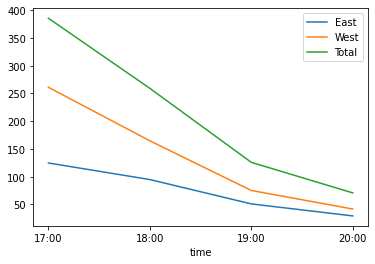

In [30]:
friday_by_time[17:21].plot(xticks=hourly_ticks[17:21])

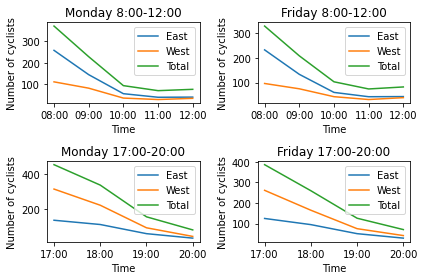

In [38]:
fig, axes = plt.subplots(2, 2)
monday_by_time[8:13].plot(ax=axes[0,0],xticks=hourly_ticks[8:13])
axes[0, 0].set_title('Monday 8:00-12:00')
friday_by_time[8:13].plot(ax=axes[0,1],xticks=hourly_ticks[8:13])
axes[0, 1].set_title('Friday 8:00-12:00')
monday_by_time[17:21].plot(ax=axes[1,0],xticks=hourly_ticks[17:21])
axes[1, 0].set_title('Monday 17:00-20:00')
friday_by_time[17:21].plot(ax=axes[1,1],xticks=hourly_ticks[17:21])
axes[1, 1].set_title('Friday 17:00-20:00')

for ax in axes.flat:
    ax.set(xlabel='Time', ylabel='Number of cyclists')

fig.tight_layout()
